In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('clean_final_data.csv')

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()

In [5]:
title_sentscores = [i['compound'] for i in [sent.polarity_scores(x) for x in [text for text in df['title']]]]
selftext_sentscores = [i['compound'] for i in [sent.polarity_scores(x) for x in [text for text in df['selftext']]]]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


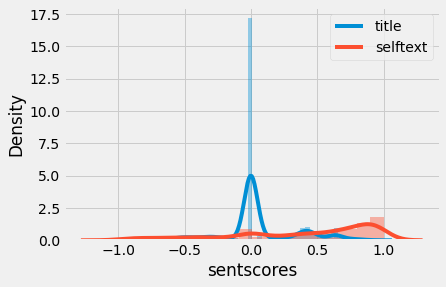

In [9]:
# plot sentiment analysis on title and selftext contents
plt.style.use('fivethirtyeight')
sns.distplot(title_sentscores)
sns.distplot(selftext_sentscores)
plt.xlabel('sentscores')
plt.legend(['title', 'selftext'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


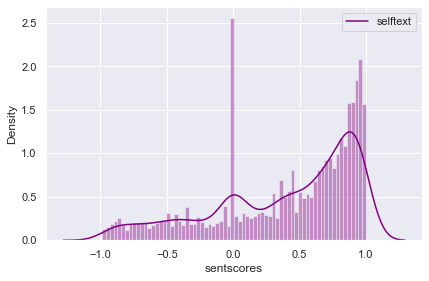

In [10]:
# plot sentiment analysis selftext contents
plt.style.use('fivethirtyeight')
sns.set_theme();
sns.distplot(selftext_sentscores, bins=70, kde =True, color='purple')
plt.xlabel('sentscores')
plt.legend(['selftext'])

In [11]:
# Imports libraries
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

In [12]:
df = df.dropna() # drop any missing values

In [13]:
# count title lenght
df['title_post_count'] = df['title'].map(lambda x: len(x))  # post count

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


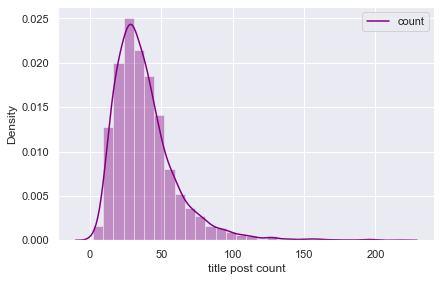

In [14]:
sns.set_theme();
sns.distplot(df['title_post_count'], bins=30, kde =True, color='purple')
plt.xlabel('title post count')
plt.legend(['count'])

In [15]:
# show the 10 longest and shortest POSTs , not words
df.sort_values(by ='title_post_count')['title'].head(10)

3964      ID
4482     NYC
222      car
4517     NYC
4767     Get
3323     USA
4253    Help
3159    What
3073    Tips
1509    What
Name: title, dtype: object

In [16]:
df.sort_values(by ='title_post_count', ascending = False)['title'].head(10)


3971    Do really think India portrayed pop culture fi...
1262    I replaced cabin air filter microfilter wifes ...
1491    Tonight I going go drive get food I tried driv...
496     What would take car manufacturers performance ...
1425    Bought previously used rental vehicle 2017 Tus...
3987    Heard somehow airline companies know googlings...
3741    Girl I OH first vacation togethe rn August Im ...
4050    Im reading 1966 edition Slowly Down The Ganges...
1986    The goto showroom automotivequality finishes H...
276     2014 nissan versa usa mod gods demanded car lo...
Name: title, dtype: object

In [17]:
df['selftext_post_count'] = df['selftext'].map(lambda x: len(x))

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


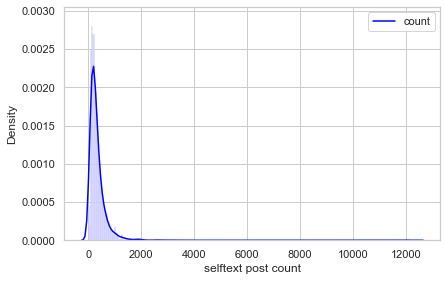

In [23]:
# plot the selftext comments count

sns.set_style("whitegrid")
sns.distplot(df['selftext_post_count'], bins=500, kde =True, color='blue')
plt.xlabel('selftext post count')
plt.legend(['count'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AttributeError: module 'matplotlib.pyplot' has no attribute 'set'

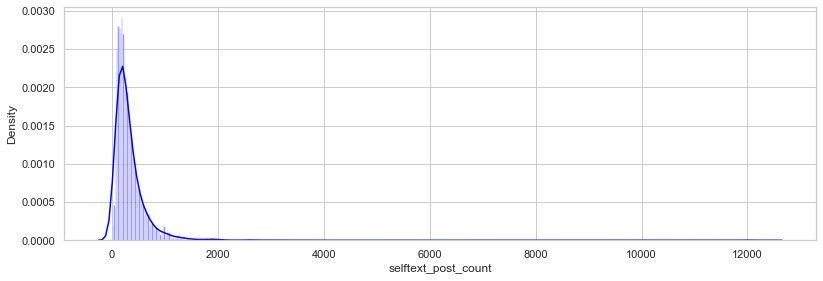

In [27]:
fig,ax = plt.subplots(figsize=(12,4))
sns.distplot(df['selftext_post_count'], bins=500, kde =True, color='blue')
plt.set(xlim=(0, 200))
plt.xlabel('selftext post count')
plt.legend(['count'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


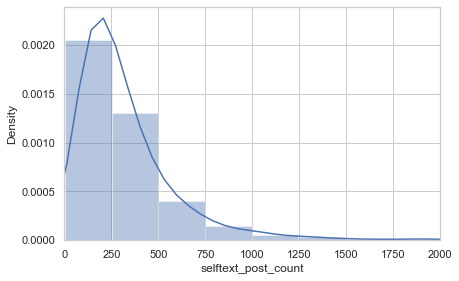

In [33]:
fig, ax = plt.subplots()
sns.distplot(df['selftext_post_count'], ax=ax)
ax.set_xlim(0,2000)
plt.show()

In [35]:
import nltk, re
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize

In [36]:
# Regex for only english terms (with dots)
ENGLISH_RE = re.compile(r'[a-z]+')
df['title_token'] = df['title'].map(lambda x: word_tokenize(x))
df['selftext_token'] = df['selftext'].map(lambda x: word_tokenize(x))

In [38]:
lmtzr = nltk.WordNetLemmatizer()

In [39]:
import itertools
# merge tokens to be list
title_merged_word = list(itertools.chain(*df['title_token']))
selftext_merged_word = list(itertools.chain(*df['selftext_token']))

# lemmatize the lists
title_word = [[lmtzr.lemmatize(word) for word in title_merged_word]]
selftext_word = [[lmtzr.lemmatize(word) for word in selftext_merged_word]]

#merge the lemmatized token 
title_word_list = list(itertools.chain(*title_word))
selftext_word_list = list(itertools.chain(*selftext_word))

# change to lower case for stop words removal
title_word_list = [x.lower() for x in title_word_list]
selftext_word_list = [x.lower() for x in selftext_word_list]

In [40]:
# remove the stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
title_words_list = [word for word in title_word_list if word not in stop]
selftext_words_list = [word for word in selftext_word_list if word not in stop]

In [41]:
# remove im, ive, dont from title_words_list and selftext_words_list
s = ['im', 'ive', 'dont']
title_words_list = [word for word in title_words_list if word not in s]
selftext_words_list = [word for word in selftext_words_list if word not in s]

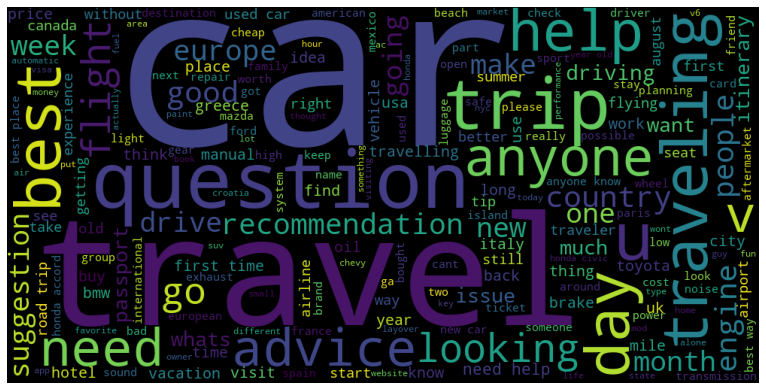

In [43]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#convert list to string and generate
unique_string=(" ").join(title_words_list)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("title_words_list"+".png", bbox_inches='tight')
plt.show()

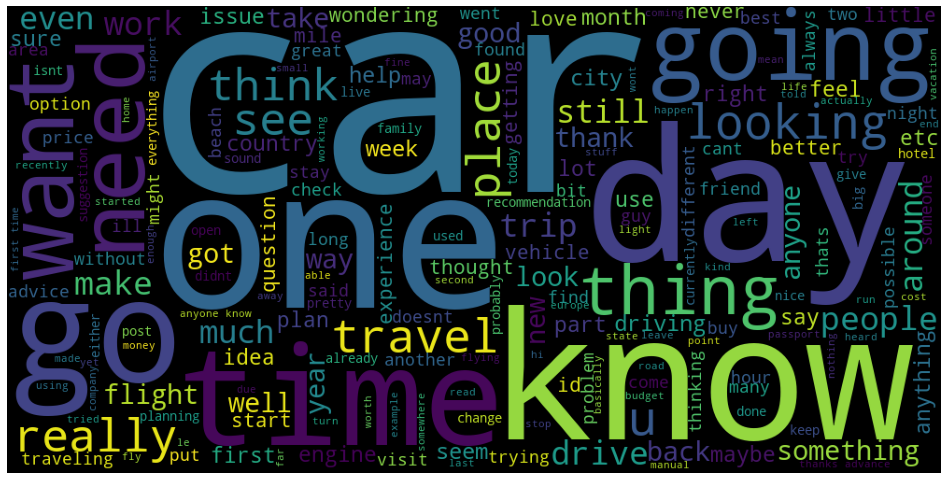

In [44]:
unique_string=(" ").join(selftext_words_list)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("selftext_words_list"+".png", bbox_inches='tight')
plt.show()

In [45]:
# Now using countvectorizer to deal with aboved stuff
df = df[['subreddit', 'selftext', 'title']]

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 

In [48]:
# combine X column to single one to do countvectorizer() - only take 1 column
df['fulltext'] = df['title'] + ' ' + df['selftext']
# set X and y
X = df['fulltext']
y = df['subreddit']

In [49]:
# baseline model
y.value_counts(normalize=True)

cars      0.52233
travel    0.47767
Name: subreddit, dtype: float64

In [50]:
# split the data into the traininig and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)

In [51]:
X_train.shape

(3401,)

In [52]:
# instantiate countvectorizer
# remove stopwords
from sklearn.feature_extraction import text 

my_words = ['im', 'ive', 'dont']
stop_words = text.ENGLISH_STOP_WORDS.union(my_words)
cvec = CountVectorizer(stop_words=stop_words)

In [53]:
# fit a transform the vectorizer
Xc_train = cvec.fit_transform(X_train)   
Xc_test = cvec.transform(X_test)

In [54]:
feature_df = pd.DataFrame(Xc_train.todense(), columns = cvec.get_feature_names())

Text(0.5, 1.0, '10 Most Common words in travel and cars subreddits')

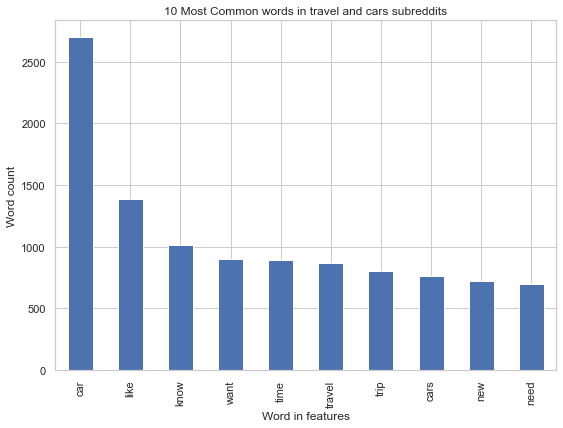

In [64]:
# 15 most common words
feature_df.sum().sort_values(ascending = False).head(10).plot(kind='bar', figsize=(8,6))
plt.xlabel('Word in features')
plt.ylabel('Word count')
plt.title('10 Most Common words in travel and cars subreddits')